# **Análisis Discriminante lineal**

El objetivo del Análisis Discriminante lineal (LDA) es encontrar el subespacio de características que optimiza la separabilidad de las clases y es una técnica supervisada.
El LDA como se conoce actualmente para múltiples clases, funciona bajo la suposición de que las clases tienen matrices de covarianza iguales y las clases tienen distribuciones normales. Otra suposición es que las instancias en el conjunto de entrenamiento son independientes entre si. Si una o más de una de las suposiciones anteriores no se cumplieran, la técnica del LDA funciona bastante bien.

## Pasos en el análisis discriminante lineal



Sea un conjunto de datos $\mathbf{X}$ de dimensiones $n\times d$ de $d$ características y n instancias:



1.   Normalizar los datos $d$-dimensionales.
2.   Calcular los vectores de medias $\mathbf{m}_i$ para cada clase.
$$\mathbf{m}_i=\frac{1}{n_i}\sum_{\mathbf{x}\in D_i} \mathbf{x}_m$$
3.   Calcular las matrices: matriz de dispersión entre clases $\mathbf{S}_B$ y matriz de dispersión intra clase $\mathbf{S}_W$. Lo que se busca es maximizar el criterio de Fischer (relación entre la diferencia de las medias entre clases y la varianza intraclase)

$$J(\mathbf{w})= \frac{\mathbf{w}^T\mathbf{S}_B\mathbf{w}}{\mathbf{w}^T\mathbf{S}_W\mathbf{w}}$$

4.   Calcular los autovectores y sus correspondientes autovalores de la matriz $\mathbf{S}^{-1}_W \mathbf{S}_B$.
5.   Ordenar los autovectores en orden decreciente a los autovalores y Seleccionar $k$ autovectores que correspondan a los $k$ autovalores más grandes.
6.   Formar una matriz $\mathbf{W}$ de dimensiones $d \times k$ donde cada columna representa un autovector.
7.   Proyectar las muestras en el nuevo subespacio de características usando la matriz de transformación para obtener los datos transformados en dimensión $n \times k$.





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
from IPython.display import Image, display
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd '/content/drive/MyDrive/Inteligencia Artificial/IA - Clases de Práctica/ContenidosPorTemas'

Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/MyDrive/Inteligencia Artificial/IA - Clases de Práctica/ContenidosPorTemas'
/content


Vamos a utilizar un dataset disponible de vinos (Wine dataset) que consiste en 178 instancias de 13 características que describen sus propiedades químicas. Las instancias pertenecen a una de 3 clases: 1,2,3 que hacen referencia a 3 tipos uvas cultivadas en una misma región de Italia pero derivadas de diferentes viñedos.

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Extrae del dataset la columna correspondiente a las clases (columna 0) para formar el vector **y** y los datos **X** correspondientes a las características

In [3]:
Predictoras = df_wine.drop(columns=[0])
Etiquetas = df_wine[0]


Divide los datos en conjuntos de entrenamiento `X_train` y `y_train` y conjuntos de prueba `X_test` y `y_test` utiliza `random_state=42`

In [4]:
from sklearn.model_selection import train_test_split

# division de los datos en test y prueba mas las etiquetas
Predictoras_train, Predictoras_test, Etiquetas_train, Etiquetas_test = train_test_split(Predictoras, Etiquetas, test_size=0.2, shuffle=True, random_state=42,  stratify = Etiquetas)

# Resetear los índices para que sean secuenciales
X_train = Predictoras_train.reset_index(drop=True)
X_test = Predictoras_test.reset_index(drop=True)
Etiquetas_train = Etiquetas_train.reset_index(drop=True)
Etiquetas_test = Etiquetas_test.reset_index(drop=True)


1. Normaliza los datos (d=13) para obtener las variables escaladas `X_train_std` y `X_test_std`.

In [5]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X_train)

Predictoras_train_std = std_scaler.transform(X_train)
Predictoras_test_std = std_scaler.transform(X_test)



2. Calcular los vectores de medias $\mathbf{m}_i$ para cada clase.
$$\mathbf{m}_i= \left[ \begin{align} &\mu_0^{i} \\ &\mu_1^{i} \\ &\:\vdots \\ &\mu_{11}^{i} \end{align} \right] , \quad i=1,2,3$$

Guardar los 3 vectores en una lista llamada `mean_vecs`

In [6]:
np.set_printoptions(precision = 4)

df_Predictoras_train = pd.DataFrame(Predictoras_train_std)
df_Predictoras_train ['Etiquetas'] = Etiquetas_train

# Agrupar por etiquetas y calcular la media para cada grupo
medias_por_etiqueta = df_Predictoras_train.groupby('Etiquetas').mean()

# Convertir las filas del DataFrame de medias en una lista de vectores
mean_vecs = [fila.tolist() for _, fila in medias_por_etiqueta.iterrows()]

# Mostrar los resultados
print(mean_vecs[0])
type(mean_vecs)

[0.9128668073246307, -0.252046364059337, 0.3446167794328656, -0.7357081042119203, 0.45342864194974986, 0.8845319265959528, 0.996961558188203, -0.5403062594781857, 0.4813421390908423, 0.2101089388154294, 0.43407820756478094, 0.770877685583328, 1.174500104253942]


list

3. Cálculo de las matrices:

**Matriz intra-clase:**

$\mathbf{S}_W = \sum \mathbf{S_i}$

Matriz de dispersión por clase:

$\mathbf{S}_i = \sum_{\mathbf{x}\in D_i}(\mathbf{x} - \mathbf{m}_i)(\mathbf{x}- \mathbf{m}_i)^T$

donde $D_i$ es el conjunto de instancias correspondiente a la clase $i$

In [7]:
d = 13
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # matriz de dispersión de cada clase
    for row in Predictoras_train_std[Etiquetas_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # vectores columna
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # suma de las matrices de dispersión

print('Matriz de dispersión intra-clase: '
      f'{S_W.shape[0]}x{S_W.shape[1]}')

AttributeError: 'list' object has no attribute 'reshape'

In [7]:
d = 13
S_W = np.zeros((d, d))

# Asegurarse de que mean_vecs sea un array de NumPy
mean_vecs = np.array(mean_vecs)

# Asegurarse de que Predictoras_train_std sea un array de NumPy
Predictoras_train_std = np.array(Predictoras_train_std)

for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # matriz de dispersión de cada clase
    
    # Filtrar filas correspondientes a la etiqueta y asegurar que son arrays de NumPy
    for row in Predictoras_train_std[Etiquetas_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # vectores columna
        class_scatter += (row - mv).dot((row - mv).T)
    
    S_W += class_scatter  # suma de las matrices de dispersión

print('Matriz de dispersión intra-clase: '
      f'{S_W.shape[0]}x{S_W.shape[1]}')

Matriz de dispersión intra-clase: 13x13


In [45]:
for i in mean_vecs:
    print(i)

[0.9128668073246307, -0.252046364059337, 0.3446167794328656, -0.7357081042119203, 0.45342864194974986, 0.8845319265959528, 0.996961558188203, -0.5403062594781857, 0.4813421390908423, 0.2101089388154294, 0.43407820756478094, 0.770877685583328, 1.174500104253942]
[-0.867974368084447, -0.38783846859343757, -0.4819671898395615, 0.23827145251193316, -0.349028589791108, -0.08761834954291584, 0.027463168717054863, -0.024815585738837007, 0.13112253791080522, -0.8624472531613747, 0.4477333963047744, 0.23529329119811004, -0.7097471615675773]
[0.172889448330421, 0.8934992584372315, 0.2967142417765785, 0.5525475817047406, -0.03727675140908122, -0.9625988059490425, -1.274278785571518, 0.7054969100681165, -0.7920280315311963, 1.0337992975229786, -1.2084862985504468, -1.3063939163344402, -0.3880504392258787]


**Matriz entre-clases:**

$\mathbf{S}_B = \sum_{i=1}^{c}n_i(\mathbf{m}_i - \mathbf{m})(\mathbf{m}_i- \mathbf{m})^T$

Donde $\mathbf{m}$ es el vector de medias global considerando todas las clases.

In [43]:
mean_overall = np.mean(Predictoras_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)  # lo hago vector columna

d = 13  # number of features
S_B = np.zeros((d, d))

for i, mean_vec in enumerate(mean_vecs):
    n = Predictoras_train_std[Etiquetas_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Matriz de dispersión entre clases: '
      f'{S_B.shape[0]}x{S_B.shape[1]}')

Matriz de dispersión entre clases: 13x13


4.   Calcule los autovectores y sus correspondientes autovalores de la matriz $\mathbf{S}^{-1}_W \mathbf{S}_B$.

In [45]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

5.   Ordene los autovectores en orden decreciente a los autovalores y Seleccione $k$ autovectores de acuerdo a los $k$ autovalores más grandes

**Ordene los autovectores en orden descendente de los autovalores:**

In [10]:
# lista de tuplas (autovalor, autovector)
eigen_pairs = [ (np.abs(eigen_vals[i]), eigen_vecs[:, i].real) for i in range(len(eigen_vals))]

# ordenamos las tuplas de mayor a menor
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('Autovalores en orden descendente:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Autovalores en orden descendente:

10.231209129392678
4.521159182084716
8.881784197001252e-16
7.401007764324254e-16
7.401007764324254e-16
6.839226818719281e-16
5.88336592986678e-16
5.88336592986678e-16
3.4267174316661067e-16
2.512240247803768e-16
1.4453943114721853e-16
1.0326157498833716e-16
1.0326157498833716e-16


6.   Forme la matriz $\mathbf{W}$ de dimensiones $d \times k$ donde cada columna representa un autovector.

In [11]:
w = np.hstack( (eigen_pairs[0][1].reshape(13,1), eigen_pairs[1][1].reshape(13,1)) )
print('Matriz W:\n', w)

Matriz W:
 [[-0.081  -0.3231]
 [ 0.0804 -0.2982]
 [-0.0165 -0.3716]
 [ 0.1807  0.301 ]
 [-0.0313  0.009 ]
 [ 0.2004  0.005 ]
 [-0.8091  0.2134]
 [-0.0854  0.0487]
 [ 0.0836  0.1605]
 [ 0.2817 -0.4636]
 [-0.0427  0.094 ]
 [-0.264  -0.0614]
 [-0.3052 -0.526 ]]


7.   Proyecte las muestras en el nuevo subespacio de características usando la matriz de transformación para obtener los datos transformados en dimensión $n \times k$.

In [53]:
X_train_lda = Predictoras_train_std.dot(w)
X_train_lda

array([[-1.1453e+00, -9.9839e-01],
       [-1.2417e+00, -8.1367e-01],
       [-1.6260e+00, -1.3450e+00],
       [-1.4394e+00, -1.4160e+00],
       [ 1.9254e+00, -1.1871e+00],
       [ 2.1133e+00, -9.6729e-01],
       [ 4.6364e-02,  1.8110e+00],
       [ 1.5451e+00, -9.6306e-01],
       [-1.4070e+00, -1.9634e+00],
       [-1.4996e+00, -1.0334e+00],
       [ 2.0639e-03,  1.7801e+00],
       [ 4.9799e-01,  2.3291e+00],
       [-1.2496e+00, -1.5658e+00],
       [-1.1668e+00, -1.6488e-01],
       [ 1.3951e+00, -2.2212e-01],
       [ 1.7560e-01,  1.4662e+00],
       [-9.9558e-02,  2.3859e+00],
       [-8.8785e-02,  9.9349e-01],
       [-1.2470e+00, -1.8181e-01],
       [-1.0553e+00, -6.8221e-01],
       [-4.8221e-01,  7.4260e-01],
       [ 1.8550e+00, -8.2216e-01],
       [-2.1829e+00, -1.2592e+00],
       [ 1.7753e+00, -1.8755e+00],
       [ 2.2378e+00, -1.6893e+00],
       [-1.3767e+00, -9.3274e-01],
       [-1.3276e+00, -6.0130e-01],
       [ 2.9930e-01,  1.4020e+00],
       [-3.5442e-02,

Realice un **gráfico de dispersión** de los datos tranformados `X_train_lda` en 2 dimensiones, utilice diferentes marcadores ('o', 's' ,'^') y diferentes colores para las 3 clases. Considera que las clases son separables en este subespacio?

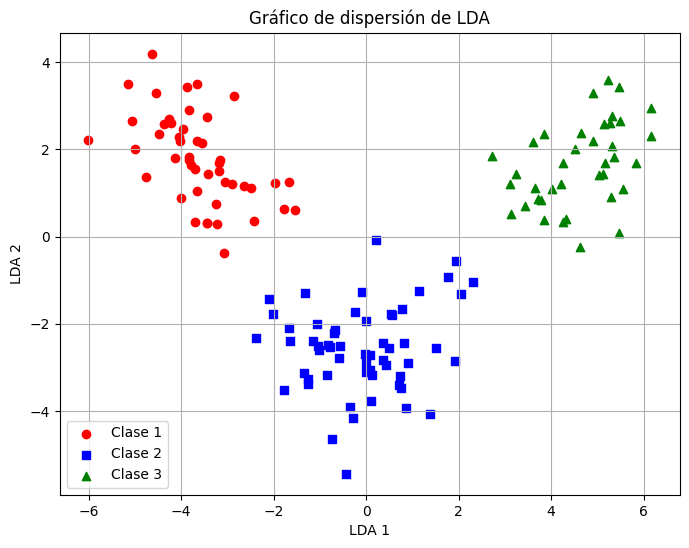

In [48]:
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
for label, color, marker in zip(np.unique(Etiquetas_train), colors, markers):
    plt.scatter(
        x = X_train_lda[Etiquetas_train == label, 0],  # Eje x
        y = X_train_lda[Etiquetas_train == label, 1],  # Eje y
        color=color, 
        marker=marker, 
        label=f'Clase {label}'
    )

# Añadir etiquetas y leyenda
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.title('Gráfico de dispersión de LDA')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [50]:
x = X_train_lda[Etiquetas_train == 1, 0],  # Eje x
print(x)

(array([-3.1579, -3.4236, -4.4832, -3.9689, -3.8793, -4.1348, -3.4455,
       -3.2173, -3.4383, -2.9096, -6.0187, -3.7958, -3.6605, -4.2115,
       -1.7737, -3.8365, -3.6549, -3.6645, -2.4254, -3.2462, -4.7686,
       -4.0114, -3.4355, -2.853 , -3.8325, -4.2638, -3.6931, -1.6732,
       -4.0202, -3.0734, -1.5438, -2.651 , -5.0675, -3.5535, -3.8393,
       -4.3641, -1.9791, -2.4948, -4.5356, -3.1769, -4.049 , -3.6923,
       -5.0006, -5.1409, -3.0533, -4.6332, -3.1756]),)


## LDA usando Scikit-Learn

Usando la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html), utilice el análisis discriminante lineal de scikit learn sobre `X_train_std`para obtener el mismo resultado. Compare los graficos de dispersión.

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Inicializar el modelo LDA para reducir a dos dimensiones
lda = LDA(n_components=2)  # Reducción a dos componentes

# Ajustar el modelo a los datos de entrenamiento
lda.fit(Predictoras_train_std, Etiquetas_train)

# Transformar los datos de entrenamiento para reducir su dimensionalidad a dos dimensiones
Predictoras_train_lda = lda.transform(Predictoras_train_std)

# Mostrar las dimensiones de los datos transformados
print(f'Dimensiones de Predictoras_train_lda: {Predictoras_train_lda.shape}')

Dimensiones de Predictoras_train_lda: (142, 2)


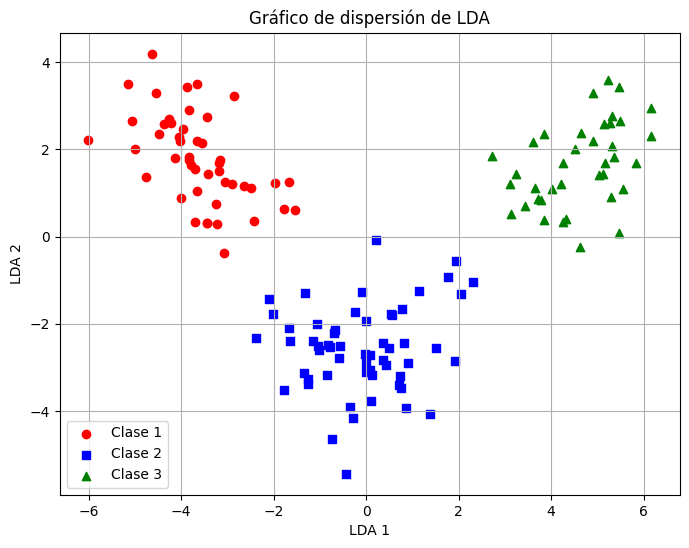

In [25]:
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
for label, color, marker in zip(np.unique(Etiquetas_train), colors, markers):
    plt.scatter(
        x = Predictoras_train_lda[Etiquetas_train == label, 0],  # Eje x
        y = Predictoras_train_lda[Etiquetas_train == label, 1],  # Eje y
        color=color, 
        marker=marker, 
        label=f'Clase {label}'
    )

# Añadir etiquetas y leyenda
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.title('Gráfico de dispersión de LDA')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [ ]:
# Transformar los datos de entrenamiento
X_train_lda = lda.transform(Predictoras_train_std)

# Transformar los datos de prueba
X_test_lda = lda.transform(Predictoras_test_std)


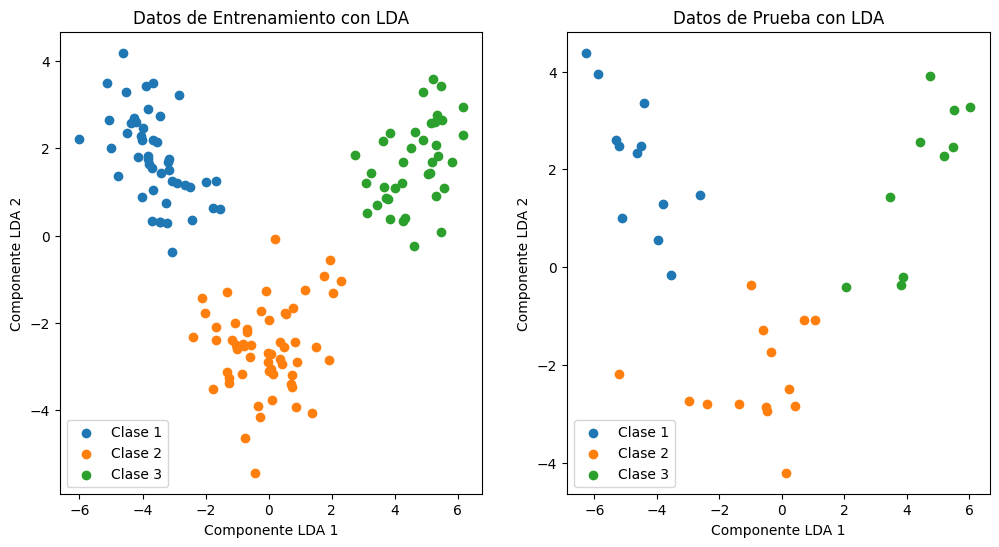

In [14]:
#Grafico los datos transformados (gráfico de dispersión)
import matplotlib.pyplot as plt

# Visualizar los datos de entrenamiento proyectados
plt.figure(figsize=(12, 6))

# Graficar los datos de entrenamiento en el espacio LDA
plt.subplot(1, 2, 1)
for label in np.unique(Etiquetas_train):
    plt.scatter(X_train_lda[Etiquetas_train == label, 0], X_train_lda[Etiquetas_train == label, 1], label=f'Clase {label}')
plt.xlabel('Componente LDA 1')
plt.ylabel('Componente LDA 2')
plt.title('Datos de Entrenamiento con LDA')
plt.legend()

# Graficar los datos de prueba en el espacio LDA
plt.subplot(1, 2, 2)
for label in np.unique(Etiquetas_test):
    plt.scatter(X_test_lda[Etiquetas_test == label, 0], X_test_lda[Etiquetas_test == label, 1], label=f'Clase {label}')
plt.xlabel('Componente LDA 1')
plt.ylabel('Componente LDA 2')
plt.title('Datos de Prueba con LDA')
plt.legend()

plt.show()


Evalue el modelo con los datos de prueba `X_test_std` y calcule el `accuracy`

In [40]:
from sklearn.metrics import accuracy_score

# Inicializar el modelo LDA
lda = LDA(n_components=2)  # Puedes ajustar el número de componentes según tu necesidad

# Ajustar el modelo a los datos de entrenamiento
lda.fit(Predictoras_train_std, Etiquetas_train)

# Obtener los coeficientes de la ecuación lineal
coeficientes = lda.coef_

print("Coeficientes de LDA:", coeficientes)

# Predecir las etiquetas para los datos de prueba
y_pred = lda.predict(Predictoras_test_std)

# Calcular la precisión (accuracy)
accuracy = accuracy_score(Etiquetas_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')


Coeficientes de LDA: [[  1.8121   0.1259   1.3201  -2.7371   0.2836  -2.0131   7.4017   0.7002
   -1.3328  -1.3657   0.1335   2.8226   4.6785]
 [ -1.4294  -1.3586  -1.6636   1.305    0.0482  -0.0285   1.1624   0.2403
    0.6992  -2.1516   0.4325  -0.2088  -2.2832]
 [ -0.0973   1.8822   0.8627   1.4279  -0.4231   2.5326 -10.8983  -1.2265
    0.5997   4.9166  -0.8139  -3.1779  -2.3618]]
Accuracy: 0.9444
